To predict the prices of homes based on the properties of the house.

In [10]:
import pandas as pd
data = pd.read_csv("http://jse.amstat.org/v19n3/decock/AmesHousing.txt", sep='\t')
train = data[0:1460]
test = data[1460:]
target = 'SalePrice'
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


The train data over here will be used to create the linear regression model, while the test data will be used to figure out the accuracy of the linear regression model.

## Use linear regression to model the data
- - - - - - - -- -- - 
In this case, we will use the **simple linear regression** to evaluate the relationship between 2 variable--living area("Gr Liv Area") and price("SalePrice"). `linearRegression.fit()` is a pretty convinent function that it can turn the input data into the linear function and you dont need to worry about the calculation. We can also use the `mean_squared_error` to get the total cariance of the linear function.

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(lr.coef_)
print(train_rmse)
print(test_rmse)

[116.86624683]
56034.362001412796
57088.25161263909


In this case, we use the `lr.coef_()` to get the coefficient of the linear function which is 116.87. More than that, the standard error for the train data is 56034 and test data is 57088. Now, let's make the result more visible by plotting.

Following is the linear regression line made from data in "train". 

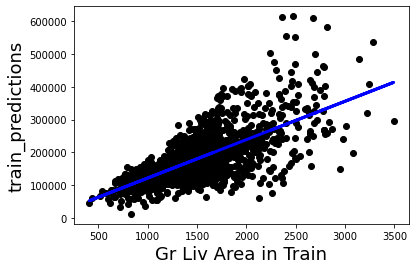

In [12]:
import matplotlib.pyplot as plt
plt.scatter(train[['Gr Liv Area']], train[['SalePrice']],  color='black')
plt.xlabel('Gr Liv Area in Train', fontsize = '18')
plt.ylabel('train_predictions' ,fontsize = '18')
trainPlot =plt.plot(train[['Gr Liv Area']], train_predictions, color='blue', linewidth=3)
trainPlot

And now lets put the model into test data set to see if it can predict the value precisely.

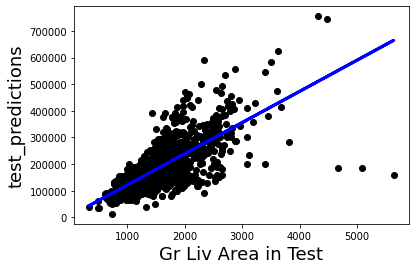

In [13]:
import matplotlib.pyplot as plt
plt.scatter(test[['Gr Liv Area']], test[['SalePrice']],  color='black')
plt.xlabel('Gr Liv Area in Test', fontsize = '18')
plt.ylabel('test_predictions' ,fontsize = '18')
testPlot = plt.plot(test[['Gr Liv Area']], test_predictions, color='blue', linewidth=3)
testPlot

Since all the data looks like concentrate on the linear regression model, we should conclude that the model can predict the "Sale Price" .

## Use Multiple Regression to model the data
- - - - - - - - -- - - -- -
In the real world, Multiple Regression is a more useful technique since we need to evaluate more than one correlation in most cases. Now, we will still predict the SalePrice, but with one more variable -- Overall Condition (Overall Cond). In this case the model will be a **Binary Linear Equation** in the form of : 
$$
Y = a_0 + coef_{Cond} * (Overall Cond) + coef_{Area} * (Gr Liv Area)
$$

$a_0$ stands for the intial value while both "Overall Cond" and "Gr Liv Area" is zero

$coef_{Cond}$ stands for the coefficient of Overall Cond

$coef_{Area}$ stands for the coefficient of Gr Liv Area

In [14]:
from sklearn.metrics import mean_squared_error
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(lr.coef_)
print(lr.intercept_)
print(train_rmse_2)
print(test_rmse_2)


[-409.56846611  116.73118339]
7858.691146390454
56032.39801525867
57066.90779448559


such that the linear model will be like: 
$$
Y = 7858.7 - 409.6 * (Overall Cond) + 116.7 * (Gr Liv Area)
$$

However, it's hard to make a geometric explanation since the model will be either surface or high-dimension which cant be plotted. 